# Web Scraping
In this notebook, we will investigate how we can scrap amazon.com for information about the top 100 book releases and poloneix for ethereum USD price history.

#### Install necessary libraries

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install bs4
#!pip install ast
#!pip install matplotlib

#### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup
import datetime
import ast
import csv
import requests
from IPython.display import HTML

%matplotlib inline

## Amazon Books Web Scrapping

Here we will scrape the following website:
<html>https://www.amazon.ca/gp/new-releases/books</html>
to find the top 100 books plus relevant information.

In [4]:
HTML('https://www.amazon.ca/gp/new-releases/books')

#### Open URL and read the contents

In [5]:
#url = urllib.request.urlopen('https://www.amazon.ca/gp/new-releases/books')
#content = url.read()
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
r = requests.get('https://www.amazon.ca/gp/new-releases/books', headers=headers)
content = r.content
print (content[0:1000])

b'\n\n      \n\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n\n  \n\n  \n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        \n        \n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!doctype html><html class="a-no-js" data-19ax5a9jf="dingo">

#### Use beautifulsoup to parse the content

In [6]:
soup = BeautifulSoup(content, 'lxml')
print(soup)

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo">
<head>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {
var ue_hob=+new Date();
var ue_id='QXCRB7KGMBX2DZ5XGMRY',
ue_csm = window,
ue_err_chan = 'jserr-rw',
ue = {};
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);

ue.stub(ue,"log");ue.stub(ue,"onunload");ue.stub(ue,"onflush");

(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!=

### Find the top 100 books
Let's parse this data to find the find the top 100 books and information about these books, such as author, release date, price, format, etc.

#### Get the hyperlinks of the child webpages
The top 100 books is divided across 2 web pages. We need to get the URL of those pages

The following is an HTML Structure for the hyperlinks of pages:

    <html>
        .....
        .....
        <ul id = 'a-pagination' >
            ..... 
            <!-- books URL are in this section-->
           <a href="https://www.amazon.ca/Sherlock-Holmes-Companion-Daniel-Smith/dp/0785827846">Sherlock-Holmes book</a>
            .....
        </div>
        .....
    </html>

In [7]:
links = []

for divTag in soup.find_all('ul',{'class': 'a-pagination'}):
    for aTag in divTag.find_all('a'):
        links.append(aTag.get('href'))

In [8]:
links = links[:-1]
links

['https://www.amazon.ca/gp/new-releases/books/ref=zg_bsnr_pg_1/142-7654457-9290205?ie=UTF8&pg=1',
 'https://www.amazon.ca/gp/new-releases/books/ref=zg_bsnr_pg_2/142-7654457-9290205?ie=UTF8&pg=2']

#### Get product information from each hyperlink
We will now follow each of the above hyperlinks to get information about the top 100 books.

##### Investigate contents of one link 

In [9]:
#url = urllib.request.urlopen(links[0])
#content = url.read()
r = requests.get(links[0], headers=headers)
content = r.content
soup = BeautifulSoup(content, 'lxml')

books_data = soup.findAll('li',{'class': 'zg-item-immersion'})

books_data[0]

<li class="zg-item-immersion" role="gridcell"><span class="a-list-item"><div class="a-section a-spacing-none aok-relative"><div class="a-row a-spacing-none aok-inline-block"><span class="a-size-small aok-float-left zg-badge-body zg-badge-color"><span class="zg-badge-text">#1</span></span><span class="aok-float-left zg-badge-triangle zg-badge-color"></span></div><span class="aok-inline-block zg-item"><a class="a-link-normal" href="/Unmasked-Antifas-Radical-Destroy-Democracy/dp/154605958X/ref=zg_bsnr_books_1/142-7654457-9290205?_encoding=UTF8&amp;psc=1&amp;refRID=YGZW14Q056EQRBDS89B4"><span class="zg-text-center-align"><div class="a-section a-spacing-small"><img alt="Unmasked: Inside Antifa's Radical Plan to Destroy Democracy" height="200" src="https://images-na.ssl-images-amazon.com/images/I/712q0YpnxEL._AC_UL200_SR200,200_.jpg" width="200"/></div></span>
<div aria-hidden="true" class="p13n-sc-truncate p13n-sc-line-clamp-1 p13n-sc-truncate-desktop-type2" data-rows="1">
            Unmas

##### Structure
The following is an HTML structure for each item, to help us find under which HTML tags the product information are in the links.

    <html>
        .....
        <li class = 'zg-item-immersion' >
                ..... 
               <div class="zg-badge-text"># </span>
               <div class="p13n-sc-line-clamp-1">Book title goes here </div>
               .....
               <span class="p13n-sc-price">CDN$ Price </span>
                .....
               <div class="a-link-child">Author Name </div>
                .....
               <div class="a-icon-alt">Rating </div>
                .....
               <div class="zg-release-date">Release Date </div>
                .....
               <div class="a-color-secondary">Format </div>
        </div>
        .....
    </html>

##### Parse pages

In [10]:
topBookResults = [] # Initialize a results list to store results

# We will append tuples containing the rank, price, author, 
# release date, and book format. Then we will create a 
# dataframe using this list of tuples.

# Loop through links
for link in links:
    # Open link, read and parse content
    #url = urllib.request.urlopen(link)
    #content = url.read()
    r = requests.get(link, headers=headers)
    content = r.content
    soup = BeautifulSoup(content, 'lxml')
       
    # Get the book data of each webpage by finding all elements
    # with 'div' tags
    books_data = soup.findAll('li',{'class': 'zg-item-immersion'})
    
    # Loop through each tagged 'zg_itemImmersion' item to extract
    # the rank, price, author, release date, and book format
    
    # We will store this in a tuple and append it to
    for item in books_data:
        # Get rank
        rank = item.find(class_='zg-badge-text').get_text()
        rank = rank.strip(' \t\n\r').lstrip('#') # strip unnecessary carriage handles and dots
        
        # Get name
        try:
            name = item.find(class_='p13n-sc-line-clamp-1').get_text()
        except AttributeError:
            name = item.find(class_='p13n-sc-line-clamp-2').get_text()
        name = name.strip(' \t\n\r') #strip carriage handles
        
        # Get price
        price = item.find(class_="p13n-sc-price")
        if price is not None:
            price = float(price.get_text()[4:])
        else:
            price = float('nan')
        
        # Get author (if it exists)
        author = ''
        try:       
            author = item.find(class_="a-link-child").get_text()
            author = author.rstrip('\n')
        except AttributeError:
            author = 'Unknown'
        
        # Get book rating (if it exists)
        rating = ''
        try:
            rating = item.find(class_="a-icon-alt").get_text()
            # Clean rating
            rating = float(rating[:3])
        except AttributeError:
            rating = float('nan')
        
        # Get release date (if it exists)
        release_date = ''
        try:
            release_date = item.find(class_="zg-release-date").get_text()
            # Clean date
            release_date = release_date[14:].replace('te:','')            
        except AttributeError:
            release_date = 'N/A'
            
        # Get book format
        formt = item.find(class_='a-color-secondary').get_text()
        
        topBookResults.append((
            rank, name, author, price, rating, release_date, formt
            ))
            
print (topBookResults)

[('1', "Unmasked: Inside Antifa's Radical Plan to Destroy Democracy", 'Andy Ngo', 23.69, nan, 'N/A', 'Hardcover'), ('2', 'Plant Over Processed: 75 Simple & Delicious Plant-Based Recipes for Nourishing Your Body and Eating From the Earth', 'Andrea Hannemann', 22.31, 5.0, 'N/A', 'Hardcover'), ('3', 'Candlekeep Mysteries (D&D Adventure Book - Dungeons & Dragons)', 'Wizards RPG Team', 48.84, nan, 'N/A', 'Hardcover'), ('4', 'Beyond Order: 12 More Rules for Life', 'Jordan B. Peterson', 25.76, nan, 'N/A', 'Hardcover'), ('5', 'Keep Sharp (Export)', 'Sanjay Gupta', 20.28, 4.6, 'N/A', 'Paperback'), ('6', 'The Dark Secret (Wings of Fire Graphic Novel #4): A Graphix Book', 'Tui T. Sutherland', 14.85, 4.9, 'N/A', 'Paperback'), ('7', 'The Push', 'Ashley Audrain', 24.42, 4.4, 'N/A', 'Paperback'), ('8', 'The Body Reset Diet, Revised Edition', 'Harley Pasternak', 19.8, 3.5, 'N/A', 'Paperback'), ('9', "Ask Iwata: Words of Wisdom from Satoru Iwata, Nintendo's Legendary CEO", 'Unknown', 21.12, nan, 'N/A',

#### Convert list of tuples to dataframe

In [11]:
topBookDF = pd.DataFrame(topBookResults, 
             columns=['rank','name','author','price','rating','release_date','format'])
topBookDF.head()

,rank,name,author,price,rating,release_date,format
0,1,Unmasked: Inside Antifa's Radical Plan to Dest...,Andy Ngo,23.69,NaN,N/A,Hardcover
1,2,Plant Over Processed: 75 Simple & Delicious Pl...,Andrea Hannemann,22.31,5.0,N/A,Hardcover
2,3,Candlekeep Mysteries (D&D Adventure Book - Dun...,Wizards RPG Team,48.84,NaN,N/A,Hardcover
3,4,Beyond Order: 12 More Rules for Life,Jordan B. Peterson,25.76,NaN,N/A,Hardcover
4,5,Keep Sharp (Export),Sanjay Gupta,20.28,4.6,N/A,Paperback


## Poloniex Web Scrapping

Some websites give access to data in a clean data structure format which is much easier to parse. Here is an example with Poloniex for finding the Ethereum to USD price history.

Here we will scrape the following website: https://poloniex.com/public?command=returnChartData&currencyPair=USDT_ETH&start=1435699200&end=9999999999&period=14400 to find the Ethereum to USD price history.


### Read in and parse content

In [12]:
url = urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_ETH&start=1435699200&end=9999999999&period=14400")
content = url.read()
soup = BeautifulSoup(content,'lxml')

### View body string

In [13]:
soup.body.string

'[{"date":1439006400,"high":1.85,"low":0.50000021,"open":1.65,"close":1.85,"volume":144.42819254,"quoteVolume":84.01638508,"weightedAverage":1.71904792},{"date":1439020800,"high":1.7,"low":1.40000001,"open":1.7,"close":1.40000001,"volume":129.57577588,"quoteVolume":92.52305316,"weightedAverage":1.40047016},{"date":1439035200,"high":1.40000001,"low":1.40000001,"open":1.40000001,"close":1.40000001,"volume":0,"quoteVolume":0,"weightedAverage":1.40000001},{"date":1439049600,"high":1.40000001,"low":1.40000001,"open":1.40000001,"close":1.40000001,"volume":0,"quoteVolume":0,"weightedAverage":1.40000001},{"date":1439064000,"high":1.40000001,"low":1.40000001,"open":1.40000001,"close":1.40000001,"volume":0,"quoteVolume":0,"weightedAverage":1.40000001},{"date":1439078400,"high":1.40000001,"low":1.40000001,"open":1.40000001,"close":1.40000001,"volume":0,"quoteVolume":0,"weightedAverage":1.40000001},{"date":1439092800,"high":1.40000001,"low":1.40000001,"open":1.40000001,"close":1.40000001,"volume":

### Convert string to dictionary
As seen above, the body is in a dictionary format but is stored as a string. We will use the ast library to convert this string into a dictionary

In [14]:
ethToUSDDict = ast.literal_eval(soup.body.string)
ethToUSDDict

[{'date': 1439006400,
  'high': 1.85,
  'low': 0.50000021,
  'open': 1.65,
  'close': 1.85,
  'volume': 144.42819254,
  'quoteVolume': 84.01638508,
  'weightedAverage': 1.71904792},
 {'date': 1439020800,
  'high': 1.7,
  'low': 1.40000001,
  'open': 1.7,
  'close': 1.40000001,
  'volume': 129.57577588,
  'quoteVolume': 92.52305316,
  'weightedAverage': 1.40047016},
 {'date': 1439035200,
  'high': 1.40000001,
  'low': 1.40000001,
  'open': 1.40000001,
  'close': 1.40000001,
  'volume': 0,
  'quoteVolume': 0,
  'weightedAverage': 1.40000001},
 {'date': 1439049600,
  'high': 1.40000001,
  'low': 1.40000001,
  'open': 1.40000001,
  'close': 1.40000001,
  'volume': 0,
  'quoteVolume': 0,
  'weightedAverage': 1.40000001},
 {'date': 1439064000,
  'high': 1.40000001,
  'low': 1.40000001,
  'open': 1.40000001,
  'close': 1.40000001,
  'volume': 0,
  'quoteVolume': 0,
  'weightedAverage': 1.40000001},
 {'date': 1439078400,
  'high': 1.40000001,
  'low': 1.40000001,
  'open': 1.40000001,
  'close

### Convert dictionary as dataframe
We will now convert this dictionary to a dataframe.

In [15]:
ethToUSDDF = pd.DataFrame(ethToUSDDict)
ethToUSDDF.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1439006400,1.85,0.5,1.65,1.85,144.428193,84.016385,1.719048
1,1439020800,1.70,1.4,1.70,1.40,129.575776,92.523053,1.400470
2,1439035200,1.40,1.4,1.40,1.40,0.000000,0.000000,1.400000
3,1439049600,1.40,1.4,1.40,1.40,0.000000,0.000000,1.400000
4,1439064000,1.40,1.4,1.40,1.40,0.000000,0.000000,1.400000


### Modify date
The date is currently in unix format. We can use the datetime library to convert this into a readable format.


In [16]:
ethToUSDDF['date'] = ethToUSDDF['date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
ethToUSDDF.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,2015-08-08 00:00:00,1.85,0.5,1.65,1.85,144.428193,84.016385,1.719048
1,2015-08-08 04:00:00,1.70,1.4,1.70,1.40,129.575776,92.523053,1.400470
2,2015-08-08 08:00:00,1.40,1.4,1.40,1.40,0.000000,0.000000,1.400000
3,2015-08-08 12:00:00,1.40,1.4,1.40,1.40,0.000000,0.000000,1.400000
4,2015-08-08 16:00:00,1.40,1.4,1.40,1.40,0.000000,0.000000,1.400000


### Extract date from date column (no time)

In [17]:
ethToUSDDF['date_only'] = ethToUSDDF['date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").date())
ethToUSDDF.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage,date_only
0,2015-08-08 00:00:00,1.85,0.5,1.65,1.85,144.428193,84.016385,1.719048,2015-08-08
1,2015-08-08 04:00:00,1.70,1.4,1.70,1.40,129.575776,92.523053,1.400470,2015-08-08
2,2015-08-08 08:00:00,1.40,1.4,1.40,1.40,0.000000,0.000000,1.400000,2015-08-08
3,2015-08-08 12:00:00,1.40,1.4,1.40,1.40,0.000000,0.000000,1.400000,2015-08-08
4,2015-08-08 16:00:00,1.40,1.4,1.40,1.40,0.000000,0.000000,1.400000,2015-08-08


### Get aggregate price information per day
We will find the average price per dayethToUSDDF

In [18]:
aggEthToUSDDF = ethToUSDDF.groupby('date_only')[['high','low']].mean()
aggEthToUSDDF.head()

,high,low
date_only,,
2015-08-08,1.525000,1.250000
2015-08-09,1.400000,1.400000
2015-08-10,1.276667,1.276667
2015-08-11,0.898333,0.823333
2015-08-12,1.250000,1.190000


### Reset index and rename date column

In [19]:
aggEthToUSDDF.reset_index(inplace=True) # Reset the index
aggEthToUSDDF.rename(columns={'date_only': 'date'}, inplace=True) # Rename date only column
aggEthToUSDDF.head()

,date,high,low
0,2015-08-08,1.525000,1.250000
1,2015-08-09,1.400000,1.400000
2,2015-08-10,1.276667,1.276667
3,2015-08-11,0.898333,0.823333
4,2015-08-12,1.250000,1.190000


### Compute average price per day

In [20]:
aggEthToUSDDF['average'] = 0.5*(aggEthToUSDDF['high'] + aggEthToUSDDF['low']) # Find the average of the high and low
aggEthToUSDDF.head()

,date,high,low,average
0,2015-08-08,1.525000,1.250000,1.387500
1,2015-08-09,1.400000,1.400000,1.400000
2,2015-08-10,1.276667,1.276667,1.276667
3,2015-08-11,0.898333,0.823333,0.860833
4,2015-08-12,1.250000,1.190000,1.220000


### Plot USD to Ethereum Transfer Rate by date

Text(0, 0.5, 'USD/ETH')

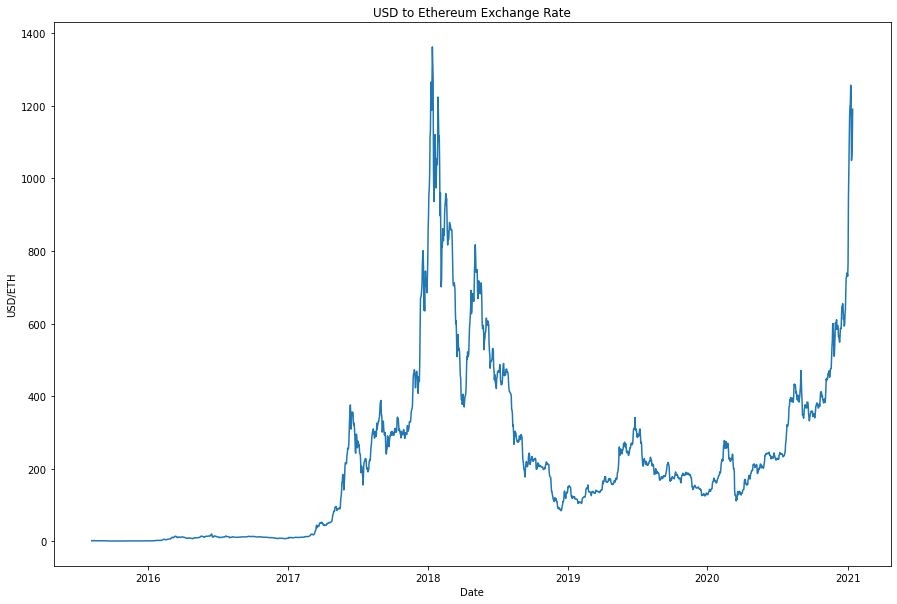

In [21]:
plt.figure(figsize=(15,10))
plt.plot('date','average',data=aggEthToUSDDF)
plt.title('USD to Ethereum Exchange Rate')
plt.xlabel('Date')
plt.ylabel('USD/ETH')